In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import zscore
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve,roc_auc_score

In [2]:
df=pd.read_csv("micro.csv")

In [3]:
df

Unnamed: 0  label       msisdn     aon  daily_decr30  daily_decr90  \
0                1      0  21408I70789   272.0   3055.050000   3065.150000   
1                2      1  76462I70374   712.0  12122.000000  12124.750000   
2                3      1  17943I70372   535.0   1398.000000   1398.000000   
3                4      1  55773I70781   241.0     21.228000     21.228000   
4                5      1  03813I82730   947.0    150.619333    150.619333   
...            ...    ...          ...     ...           ...           ...   
209588      209589      1  22758I85348   404.0    151.872333    151.872333   
209589      209590      1  95583I84455  1075.0     36.936000     36.936000   
209590      209591      1  28556I85350  1013.0  11843.111670  11904.350000   
209591      209592      1  59712I82733  1732.0  12488.228330  12574.370000   
209592      209593      1  65061I85339  1581.0   4489.362000   4534.820000   

        rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0         220.13    260.13                2.0                0.0  ...   
1        3691.26   3691.26               20.0                0.0  ...   
2         900.13    900.13                3.0                0.0  ...   
3         159.42    159.42               41.0                0.0  ...   
4        1098.90   1098.90                4.0                0.0  ...   
...          ...       ...                ...                ...  ...   
209588   1089.19   1089.19                1.0                0.0  ...   
209589   1728.36   1728.36                4.0                0.0  ...   
209590   5861.83   8893.20                3.0                0.0  ...   
209591    411.83    984.58                2.0               38.0  ...   
209592    483.92    631.20               13.0                0.0  ...   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0                   6.0                 0.0          2.0            12   
1                  12.0                 0.0          1.0            12   
2                   6.0                 0.0          1.0             6   
3                   6.0                 0.0          2.0            12   
4                   6.0                 0.0          7.0            42   
...                 ...                 ...          ...           ...   
209588              6.0                 0.0          2.0            12   
209589              6.0                 0.0          3.0            18   
209590             12.0                 0.0          6.0            54   
209591             12.0                 0.0          3.0            24   
209592             12.0                 0.0          2.0            18   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                     6                 0.0  29.000000  29.000000      UPW   
1                    12                 0.0   0.000000   0.000000      UPW   
2                     6                 0.0   0.000000   0.000000      UPW   
3                     6                 0.0   0.000000   0.000000      UPW   
4                     6                 0.0   2.333333   2.333333      UPW   
...                 ...                 ...        ...        ...      ...   
209588                6                 0.0   1.000000   1.000000      UPW   
209589                6                 0.0   1.000000   1.000000      UPW   
209590               12                 0.0   4.000000   3.833333      UPW   
209591               12                 0.0   0.000000  10.500000      UPW   
209592               12                 0.0   0.000000   0.000000      UPW   

             pdate  
0       20-07-2016  
1       10-08-2016  
2       19-08-2016  
3       06-06-2016  
4       22-06-2016  
...            ...  
209588  17-06-2016  
209589  12-06-2016  
209590  29-07-2016  
209591  25-07-2016  
209592  07-07-2016  

[209593 rows x 37 columns]

There are total 209593 rows and 37 columns in the dataset. We are supposed to predict the label variable which is in the categorial form which makes it a calssification problem. Label is the output variable and all other variable are the independent variable. This is a dataset of the small telecom company, with the help of small micro finance institutes it is providing a small loans of 5 and 10 indonasian ruppee to its customers and we are to predict on the bases of given features whether the customer who has availed the loan with be able to payback or not. 

In [4]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

There are total 37 columns and the name of each column.

In [5]:
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

There are no null values in the columns

In [6]:
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

data type of each column

In [7]:
df.shape

(209593, 37)

# Univariant, Bivariant, Multivariant Analysis

In [8]:
df['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

<AxesSubplot:xlabel='daily_decr30', ylabel='Density'>

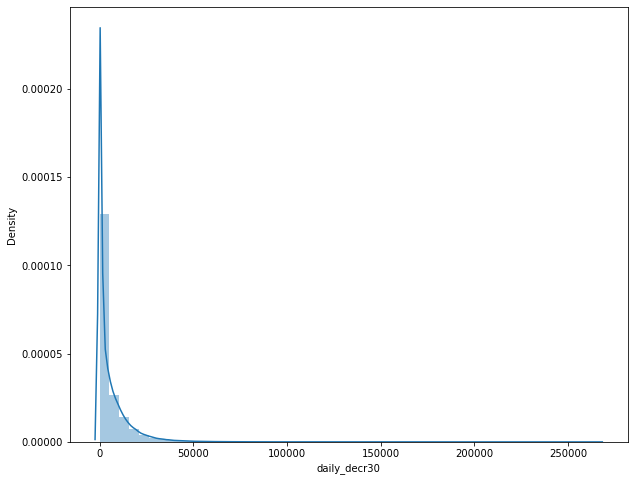

In [4]:
plt.figure(figsize=(10,8))
sns.distplot(df['daily_decr30'])

Daily_decr30 which represents the daily main account balance spent averaged over last 30 days. From the above distribution plot we can see that there is skewness in the data. The data is right skewed. It may be because of the presence of the outliers.

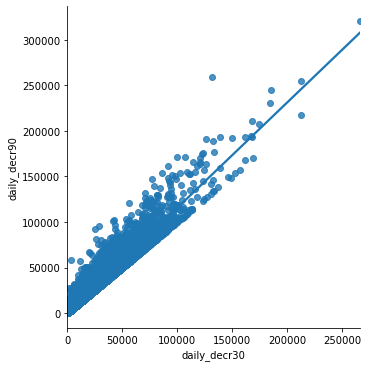

In [5]:
sns.lmplot(x='daily_decr30',y='daily_decr90',data=df)

From the above plot we can see that there is a linear relationship between daily_decr90 and daily_decr30 i.e if the amount spend from main account avergaed over last 30 days increases the amount spend from main account avaregaed over last 90 days also increases.

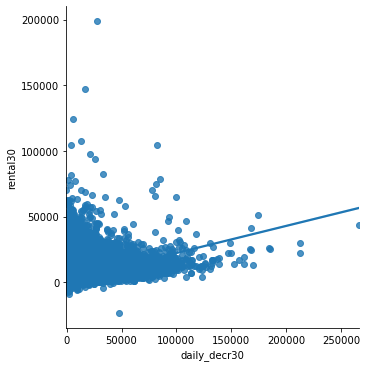

In [6]:
sns.lmplot(x='daily_decr30',y='rental30',data=df)

Daily_decr30 the rental30 are forming a strong positive relationship. If the person is spending more amount from main account in ast 30 days(which is averaged) then the average of main account balance in last 30 days also increases.

<AxesSubplot:xlabel='label', ylabel='rental90'>

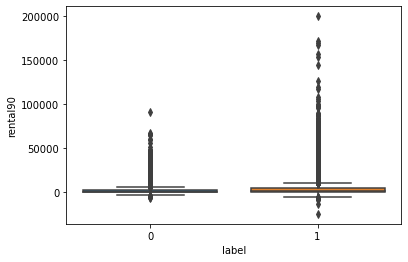

In [7]:
sns.boxplot(df['label'],df['rental90'])

From the above plot we can say that the users who have paid back the loan there average main account balance over last 90 days is more than the users who havent paid there loan back (defaulters)

<AxesSubplot:xlabel='label', ylabel='last_rech_date_ma'>

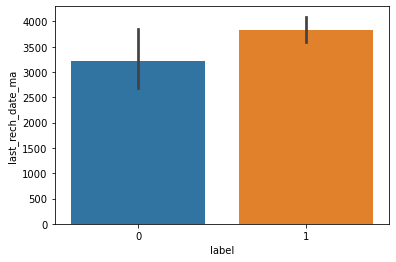

In [8]:
sns.barplot(df['label'],df['last_rech_date_ma'])

<AxesSubplot:xlabel='label', ylabel='sumamnt_ma_rech30'>

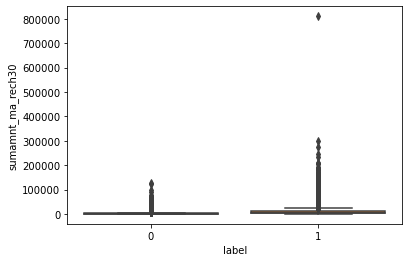

In [19]:
sns.boxplot(df['label'],df['sumamnt_ma_rech30'])

Total ammount of recharge in last 30 days for the main account is higher for the ones who paid there loan back as compared to the poeple who are at default.

<AxesSubplot:xlabel='label', ylabel='medianmarechprebal90'>

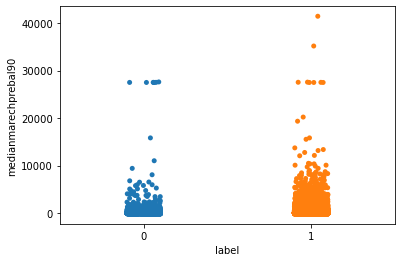

In [11]:
sns.stripplot(df['label'],df['medianmarechprebal90'])

Median for main account balance just before recharge in last 90 days for the persons who paid there loan back is higher than thoes who coult not pay back there loan.

<AxesSubplot:xlabel='cnt_da_rech30', ylabel='Density'>

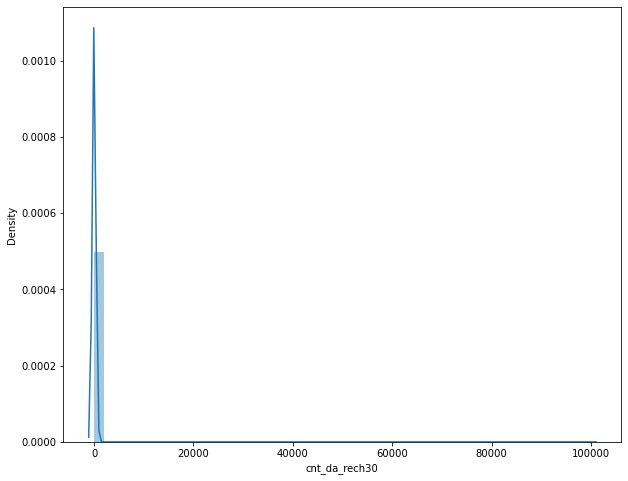

In [12]:
plt.figure(figsize=(10,8))
sns.distplot(df['cnt_da_rech30'])

From the above plot we can see that the number of times the main account got recharged in last 30 days is slightly right skewed which confirms the presence of outliers

<AxesSubplot:xlabel='label', ylabel='cnt_da_rech90'>

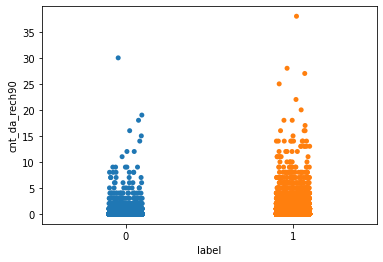

In [13]:
sns.stripplot(df['label'],df['cnt_da_rech90'])

Number of times the main account got recharged in last 90 days is higher for the persons who paid there loan back then fro the persons who didnot pay there loan back.

<AxesSubplot:xlabel='label', ylabel='amnt_loans30'>

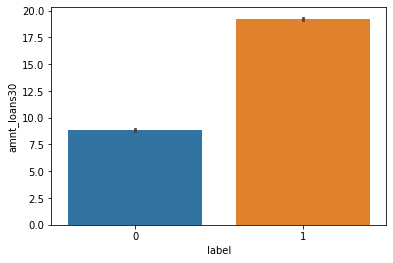

In [14]:
sns.barplot(df['label'],df['amnt_loans30'])

The total ammount of loan taken by the users in last 30 days is higher for the person who paid there loan back then for the persons who are at default.

<AxesSubplot:xlabel='maxamnt_loans90', ylabel='maxamnt_loans30'>

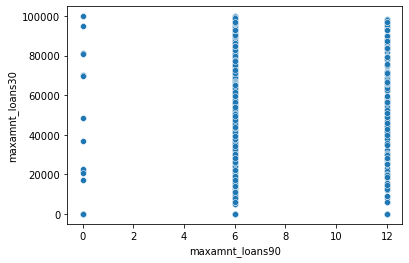

In [15]:
sns.scatterplot(y='maxamnt_loans30',x='maxamnt_loans90',data=df)

We can see from the above plot for the loan ammount there are only 2 options available i.e 5 and 10 for which are users will pay back 6 and 12 respectively either the maximum loan ammount is 0 or 6 or 12

<AxesSubplot:xlabel='label', ylabel='cnt_loans30'>

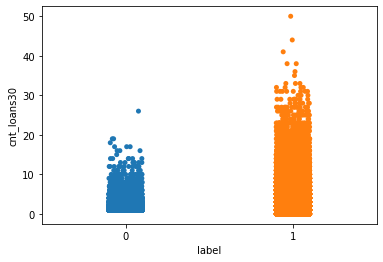

In [16]:
sns.stripplot(df['label'],df['cnt_loans30'])

Number of loans taken by the user in last 30 days is on higher side of the person who are able to payback there loans rather than for the persons who are unable to pay back.

<AxesSubplot:xlabel='payback30', ylabel='payback90'>

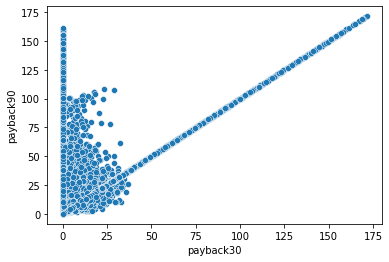

In [17]:
sns.scatterplot(y='payback90',x='payback30',data=df)

The average payback time for last 30 days as well as for last 90 days are positivly corelated to each other.

<AxesSubplot:>

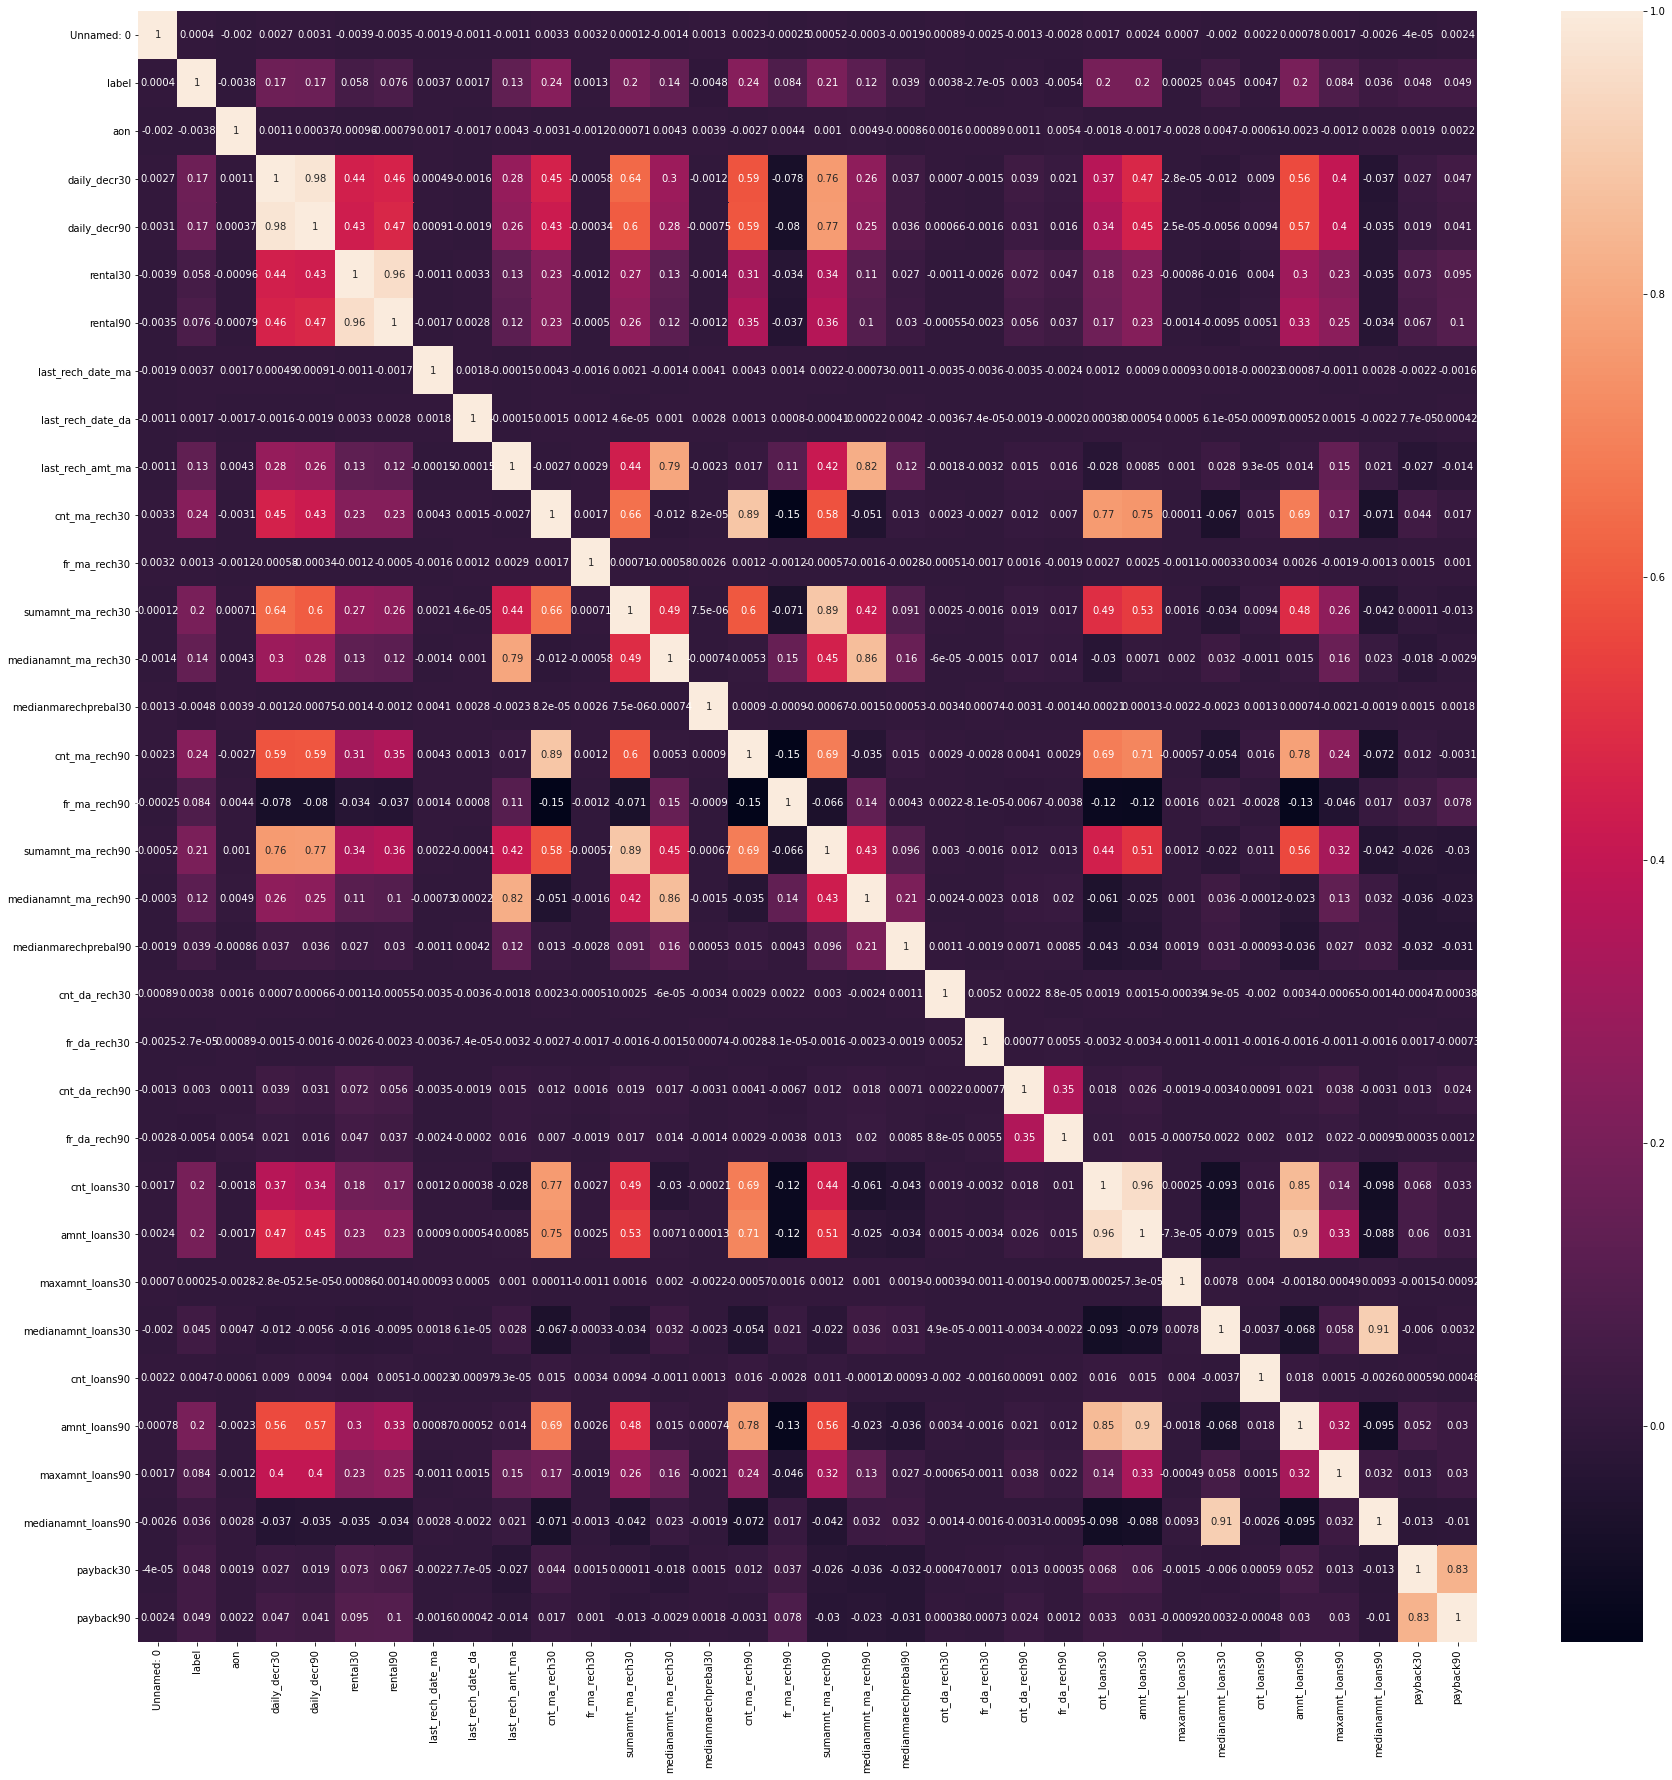

In [18]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True)

In the above heatmap,
1. payback_30 and payback_90 are positivly related to each other.
2. amnt_loan 90 is positivly related to daily_decr30 and daily_decr_90.
3. amnt_loans90 and cnt_ma_rech90 are positivly related to each other.
4. daily_decr30 and daily_decr90 are positivly related to each other.

Unnamed: 0                 AxesSubplot(0.125,0.772143;0.0824468x0.107857)
label                   AxesSubplot(0.223936,0.772143;0.0824468x0.107857)
aon                     AxesSubplot(0.322872,0.772143;0.0824468x0.107857)
daily_decr30            AxesSubplot(0.421809,0.772143;0.0824468x0.107857)
daily_decr90            AxesSubplot(0.520745,0.772143;0.0824468x0.107857)
rental30                AxesSubplot(0.619681,0.772143;0.0824468x0.107857)
rental90                AxesSubplot(0.718617,0.772143;0.0824468x0.107857)
last_rech_date_ma       AxesSubplot(0.817553,0.772143;0.0824468x0.107857)
last_rech_date_da          AxesSubplot(0.125,0.642714;0.0824468x0.107857)
last_rech_amt_ma        AxesSubplot(0.223936,0.642714;0.0824468x0.107857)
cnt_ma_rech30           AxesSubplot(0.322872,0.642714;0.0824468x0.107857)
fr_ma_rech30            AxesSubplot(0.421809,0.642714;0.0824468x0.107857)
sumamnt_ma_rech30       AxesSubplot(0.520745,0.642714;0.0824468x0.107857)
medianamnt_ma_rech30    AxesSubplot(0.

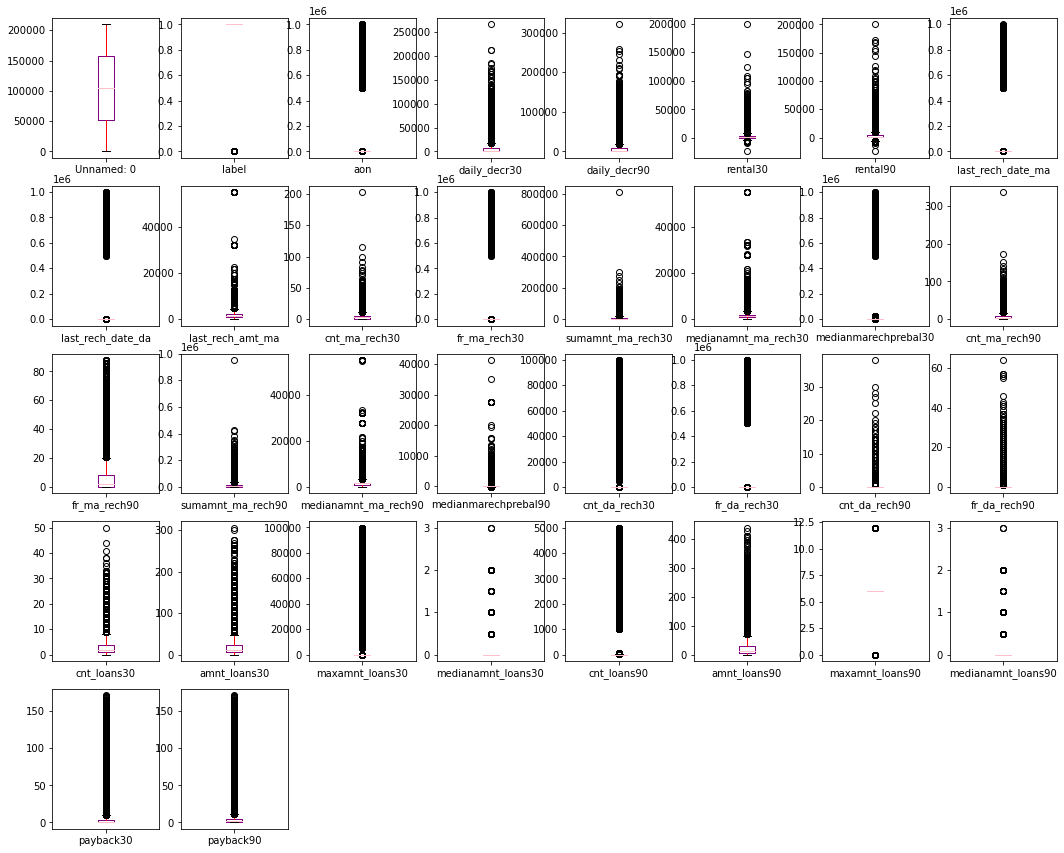

In [21]:
color=dict(boxes="Purple",whiskers="Red",medians="Pink",caps="Black")
df.plot(kind="box",subplots=True,layout=(6,8),figsize=(18,18),color=color)

The the above pairplot we can see that outliers are present in almost each and every column.

# Data Cleaning/ Preprocessing

In [22]:
df.describe()

Unnamed: 0          label            aon   daily_decr30  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean   104797.000000       0.875177    8112.343445    5381.402289   
std     60504.431823       0.330519   75696.082531    9220.623400   
min         1.000000       0.000000     -48.000000     -93.012667   
25%     52399.000000       1.000000     246.000000      42.440000   
50%    104797.000000       1.000000     527.000000    1469.175667   
75%    157195.000000       1.000000     982.000000    7244.000000   
max    209593.000000       1.000000  999860.755200  265926.000000   

        daily_decr90       rental30       rental90  last_rech_date_ma  \
count  209593.000000  209593.000000  209593.000000       209593.00000   
mean     6082.515068    2692.581910    3483.406534         3755.84780   
std     10918.812767    4308.586781    5770.461279        53905.89223   
min       -93.012667  -23737.140000  -24720.580000          -29.00000   
25%        42.692000     280.420000     300.260000            1.00000   
50%      1500.000000    1083.570000    1334.000000            3.00000   
75%      7802.790000    3356.940000    4201.790000            7.00000   
max    320630.000000  198926.110000  200148.110000       998650.37770   

       last_rech_date_da  last_rech_amt_ma  ...    cnt_loans30   amnt_loans30  \
count      209593.000000     209593.000000  ...  209593.000000  209593.000000   
mean         3712.202921       2064.452797  ...       2.758981      17.952021   
std         53374.833430       2370.786034  ...       2.554502      17.379741   
min           -29.000000          0.000000  ...       0.000000       0.000000   
25%             0.000000        770.000000  ...       1.000000       6.000000   
50%             0.000000       1539.000000  ...       2.000000      12.000000   
75%             0.000000       2309.000000  ...       4.000000      24.000000   
max        999171.809400      55000.000000  ...      50.000000     306.000000   

       maxamnt_loans30  medianamnt_loans30    cnt_loans90   amnt_loans90  \
count    209593.000000       209593.000000  209593.000000  209593.000000   
mean        274.658747            0.054029      18.520919      23.645398   
std        4245.264648            0.218039     224.797423      26.469861   
min           0.000000            0.000000       0.000000       0.000000   
25%           6.000000            0.000000       1.000000       6.000000   
50%           6.000000            0.000000       2.000000      12.000000   
75%           6.000000            0.000000       5.000000      30.000000   
max       99864.560860            3.000000    4997.517944     438.000000   

       maxamnt_loans90  medianamnt_loans90      payback30      payback90  
count    209593.000000       209593.000000  209593.000000  209593.000000  
mean          6.703134            0.046077       3.398826       4.321485  
std           2.103864            0.200692       8.813729      10.308108  
min           0.000000            0.000000       0.000000       0.000000  
25%           6.000000            0.000000       0.000000       0.000000  
50%           6.000000            0.000000       0.000000       1.666667  
75%           6.000000            0.000000       3.750000       4.500000  
max          12.000000            3.000000     171.500000     171.500000  

[8 rows x 34 columns]

We can see from the above we have huge difference btw 75% and max values which shows that outliers are present.In some columns the minimum value is in negetive. The mean is more than 50% which shows the presence of skewness.

# Feature Engineering

In [9]:
df.drop('Unnamed: 0',axis=1,inplace=True)  #droping the index column

In [10]:
df['pcircle'].value_counts()

UPW    209593
Name: pcircle, dtype: int64

In [11]:
df.drop('pcircle',axis=1,inplace=True)   #droping pcircle as we have same value in all the columns

In [12]:
df.drop('pdate',axis=1,inplace=True)    #droping the date column as it is not helping in predicting the label

In [13]:
df.drop('msisdn',axis=1,inplace=True)   #droping the mobile number of user 

In [14]:
df.skew()  #checking the skewness

label                   -2.270254
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans9

As from the above we can see that the data is highly skewed. The one of the reason for the skewness could be outliers but if we will be removing outliers we may loose important information and data loss is huge. We will be rather perfroming power transformation methods called 'Yeo-Johnnson' to deal with the outliers and skewness.

# Divinding dataset into Independent and Dependent Variable

In [15]:
x=df.iloc[:,1:] #Independent variable
x

aon  daily_decr30  daily_decr90  rental30  rental90  \
0        272.0   3055.050000   3065.150000    220.13    260.13   
1        712.0  12122.000000  12124.750000   3691.26   3691.26   
2        535.0   1398.000000   1398.000000    900.13    900.13   
3        241.0     21.228000     21.228000    159.42    159.42   
4        947.0    150.619333    150.619333   1098.90   1098.90   
...        ...           ...           ...       ...       ...   
209588   404.0    151.872333    151.872333   1089.19   1089.19   
209589  1075.0     36.936000     36.936000   1728.36   1728.36   
209590  1013.0  11843.111670  11904.350000   5861.83   8893.20   
209591  1732.0  12488.228330  12574.370000    411.83    984.58   
209592  1581.0   4489.362000   4534.820000    483.92    631.20   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                     2.0                0.0              1539              2   
1                    20.0                0.0              5787              1   
2                     3.0                0.0              1539              1   
3                    41.0                0.0               947              0   
4                     4.0                0.0              2309              7   
...                   ...                ...               ...            ...   
209588                1.0                0.0              4048              3   
209589                4.0                0.0               773              4   
209590                3.0                0.0              1539              5   
209591                2.0               38.0               773              5   
209592               13.0                0.0              7526              2   

        fr_ma_rech30  ...  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0               21.0  ...            2            12              6.0   
1                0.0  ...            1            12             12.0   
2                0.0  ...            1             6              6.0   
3                0.0  ...            2            12              6.0   
4                2.0  ...            7            42              6.0   
...              ...  ...          ...           ...              ...   
209588           2.0  ...            2            12              6.0   
209589           1.0  ...            3            18              6.0   
209590           8.0  ...            4            42             12.0   
209591           4.0  ...            2            18             12.0   
209592           1.0  ...            2            18             12.0   

        medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                      0.0          2.0            12                6   
1                      0.0          1.0            12               12   
2                      0.0          1.0             6                6   
3                      0.0          2.0            12                6   
4                      0.0          7.0            42                6   
...                    ...          ...           ...              ...   
209588                 0.0          2.0            12                6   
209589                 0.0          3.0            18                6   
209590                 0.0          6.0            54               12   
209591                 0.0          3.0            24               12   
209592                 0.0          2.0            18               12   

        medianamnt_loans90  payback30  payback90  
0                      0.0  29.000000  29.000000  
1                      0.0   0.000000   0.000000  
2                      0.0   0.000000   0.000000  
3                      0.0   0.000000   0.000000  
4                      0.0   2.333333   2.333333  
...                    ...        ...        ...  
209588                 0.0   1.000000   1.000000  
209589                 0.0   1.000000   1.000000  
209590              

In [16]:
y=df.iloc[:,:1] #dependent variable
y

label
0           0
1           1
2           1
3           1
4           1
...       ...
209588      1
209589      1
209590      1
209591      1
209592      1

[209593 rows x 1 columns]

# VIF FACTOR

In [17]:
def cal_vif(x):
    vif=pd.DataFrame()
    vif["variables"]=x.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
    return(vif)

In [18]:
cal_vif(x)

variables  VIF FACTOR
0                    aon    1.011072
1           daily_decr30   38.953683
2           daily_decr90   41.888441
3               rental30   18.261312
4               rental90   18.833294
5      last_rech_date_ma    1.004762
6      last_rech_date_da    1.004785
7       last_rech_amt_ma    6.028751
8          cnt_ma_rech30   28.083715
9           fr_ma_rech30    1.004692
10     sumamnt_ma_rech30   20.031425
11  medianamnt_ma_rech30    8.961639
12  medianmarechprebal30    1.004856
13         cnt_ma_rech90   28.763293
14          fr_ma_rech90    1.439525
15     sumamnt_ma_rech90   23.277621
16  medianamnt_ma_rech90   10.068642
17  medianmarechprebal90    1.131273
18         cnt_da_rech30    1.003914
19          fr_da_rech30    1.004726
20         cnt_da_rech90    1.159568
21          fr_da_rech90    1.142600
22           cnt_loans30   34.175954
23          amnt_loans30   45.138368
24       maxamnt_loans30    1.004173
25    medianamnt_loans30    6.383943
26           cnt_loans90    1.007032
27          amnt_loans90   19.442178
28       maxamnt_loans90    4.457969
29    medianamnt_loans90    6.324924
30             payback30    3.751991
31             payback90    3.889291

The VIF Factor calculation tells us about the multicollinearties among the columns in the above we can see that vif factors are very low so will not be droping any columns as there exist no multicollinearties.

# Skewness and Transformation

In [19]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')  #to remove skewness
x

array([[-0.17711186,  0.332156  ,  0.29918138, ..., -0.24827185,
         1.8132661 ,  1.7839639 ],
       [ 0.03645291,  1.11602076,  1.04508396, ..., -0.24827185,
        -0.93740539, -1.01891694],
       [-0.03465905, -0.00750823, -0.02820273, ..., -0.24827185,
        -0.93740539, -1.01891694],
       ...,
       [ 0.13457681,  1.10045475,  1.03342362, ..., -0.24827185,
         0.97429196,  0.75293936],
       [ 0.30910144,  1.13605673,  1.06838078, ..., -0.24827185,
        -0.93740539,  1.3378306 ],
       [ 0.27706283,  0.52502128,  0.48715657, ..., -0.24827185,
        -0.93740539, -1.01891694]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mn=MinMaxScaler()  #bringing all the variables on the same scale
x=mn.fit_transform(x)
x

# SMOTE

In [21]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()      #SMOTE to balance the target variable.
x_res,y_res=smt.fit_resample(x,y)

In [22]:
y_res.value_counts()

label
0        183431
1        183431
dtype: int64

# Performing Agorithms

In [23]:
maxacc=0  #finding the best random state
maxrs=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=.30,random_state=i)
    lm=LogisticRegression()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxacc:
        maxacc=accu
        maxrs=i
print("best accuracy is",round(maxacc,2),"at random state",maxrs)

best accuracy is 0.76 at random state 22


In [24]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x_res,y_res,test_size=.30,random_state=43)

In [25]:
dtc=DecisionTreeClassifier()  #Decision Tree Classifier
dtc.fit(x_train1,y_train1)
pred=dtc.predict(x_test1)
az=accuracy_score(y_test1,pred)
print("accuracy score",az*100)
cl=classification_report(y_test1,pred)
print(cl)

accuracy score 88.26992794773713
              precision    recall  f1-score   support

           0       0.88      0.89      0.88     54987
           1       0.89      0.88      0.88     55072

    accuracy                           0.88    110059
   macro avg       0.88      0.88      0.88    110059
weighted avg       0.88      0.88      0.88    110059



In [26]:
from sklearn.ensemble import RandomForestClassifier  #Random Forest Classifier
rf=RandomForestClassifier()
rf.fit(x_train1,y_train1)
pred=rf.predict(x_test1)
ap=accuracy_score(y_test1,pred)
ap=ap*100
print("Accuracy Score",round(ap,2))
print(classification_report(y_test1,pred))

Accuracy Score 93.26
              precision    recall  f1-score   support

           0       0.93      0.94      0.93     54987
           1       0.94      0.92      0.93     55072

    accuracy                           0.93    110059
   macro avg       0.93      0.93      0.93    110059
weighted avg       0.93      0.93      0.93    110059



In [27]:
lm=LogisticRegression()   #Logistic Regression
lm.fit(x_train1,y_train1)
pred=lm.predict(x_test1)
ap=accuracy_score(y_test1,pred)
ap=ap*100
print("Accuracy Score",round(ap,2))
print(classification_report(y_test1,pred))

Accuracy Score 75.96
              precision    recall  f1-score   support

           0       0.75      0.78      0.76     54987
           1       0.77      0.74      0.75     55072

    accuracy                           0.76    110059
   macro avg       0.76      0.76      0.76    110059
weighted avg       0.76      0.76      0.76    110059



In [28]:
knn=KNeighborsClassifier()  #Kneighbors Classifier
knn.fit(x_train1,y_train1)
pred=knn.predict(x_test1)
ap=accuracy_score(y_test1,pred)
ap=ap*100
print("Accuracy Score",round(ap,2))
print(classification_report(y_test1,pred))


Accuracy Score 87.51
              precision    recall  f1-score   support

           0       0.82      0.96      0.89     54987
           1       0.96      0.79      0.86     55072

    accuracy                           0.88    110059
   macro avg       0.89      0.88      0.87    110059
weighted avg       0.89      0.88      0.87    110059



In [29]:
ad=AdaBoostClassifier()   #Ada Boost Classifier
ad.fit(x_train1,y_train1)
pred=ad.predict(x_test1)
ap=accuracy_score(y_test1,pred)
ap=ap*100
print("Accuracy Score",round(ap,2))
print(classification_report(y_test1,pred))



Accuracy Score 82.21
              precision    recall  f1-score   support

           0       0.81      0.84      0.83     54987
           1       0.83      0.80      0.82     55072

    accuracy                           0.82    110059
   macro avg       0.82      0.82      0.82    110059
weighted avg       0.82      0.82      0.82    110059



# CROSS VALIDATION SCORE

In [30]:
print(cross_val_score(dtc,x,y,cv=5).mean())   #Decision Tree Classifier

0.8659688243802582


In [31]:
print(cross_val_score(rf,x,y,cv=5).mean())  #Random Forest classifier

0.9126831571726042


In [32]:
print(cross_val_score(ad,x,y,cv=5).mean())   #Ada Boost Classifier

0.9035511676342225


In [33]:
print(cross_val_score(knn,x,y,cv=5).mean())   #Kneighbors Classifier

0.895850536128728


In [34]:
print(cross_val_score(lm,x,y,cv=5).mean())    #Logistic Regression

0.8758403170516724


# roc_auc score

In [35]:
y_pred_prob=rf.predict_proba(x_test1)[:,1]      #ROC_AUC curve
y_pred_prob

array([0.  , 0.  , 0.01, ..., 1.  , 0.15, 0.39])

In [36]:
fpr,tpr,thresholds=roc_curve(y_test1,y_pred_prob)

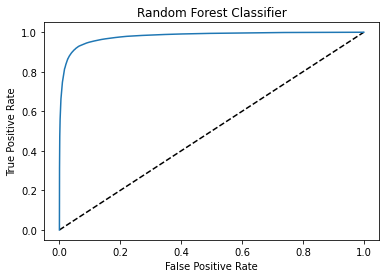

In [37]:
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="RandomForestClassifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest Classifier")
plt.show()

In [38]:
auc_score=roc_auc_score(y_test1,rf.predict(x_test1))
auc_score

0.9326149733352536

# Hyper Parameter Tunning

In [39]:
parameter={"criterion":['gini','entropy'],
           "max_depth":np.arange(2,20),
          "max_features":["auto","log2","sqrt"],
          "bootstrap":[True,False],
          "oob_score":[True,False]}

In [40]:
gcv=GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [ ]:
gcv.fit(x_train1,y_train1)

In [ ]:
gcv.best_params_ 

In [43]:
final=RandomForestClassifier(criterion="gini",max_features='auto',bootstrap=False,oob_score=False)
final.fit(x_train1,y_train1)
pred=final.predict(x_test1)
print("Accuracy Score",accuracy_score(y_test1,pred))
print("Classification Report\n",classification_report(y_test1,pred))
print(confusion_matrix(y_test1,pred))

Accuracy Score 0.9376607092559446
Classification Report
               precision    recall  f1-score   support

           0       0.93      0.94      0.94     54987
           1       0.94      0.93      0.94     55072

    accuracy                           0.94    110059
   macro avg       0.94      0.94      0.94    110059
weighted avg       0.94      0.94      0.94    110059

[[51794  3193]
 [ 3668 51404]]


# Saving the Model

In [44]:
import joblib
joblib.dump(final,"microloan.pkl")

['microloan.pkl']